### Retrieving data from rivermap.ch API

Retrieving the latest flow of the Dranse de Thonon from rivermap.ch


In [1]:
from river_forecast.api_data_access import RivermapDataRetriever

In [2]:
rivermap_data = RivermapDataRetriever()

In [29]:
flow_df = rivermap_data.get_latest_river_flow(n_days=4, station='Dranse')

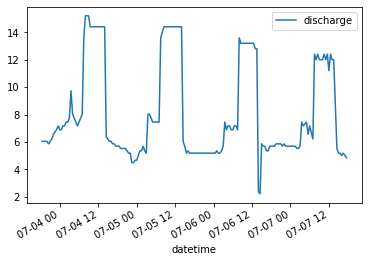

In [30]:
flow_df.plot()

In [36]:
flow_df

,discharge
datetime,
2020-07-03 18:30:00,6.04
2020-07-03 19:00:00,6.04
2020-07-03 19:30:00,6.04
2020-07-03 20:00:00,6.04
2020-07-03 20:30:00,5.86
...,...
2020-07-07 15:30:00,5.18
2020-07-07 16:00:00,5.01
2020-07-07 16:30:00,5.18


In [32]:
filled_flow_df = flow_df.asfreq('30min', method='bfill')

In [33]:
last_timestamp = filled_flow_df.index[-1]

In [34]:
import pandas as pd
last_timestamp - pd.Timedelta(days=3)

Timestamp('2020-07-04 17:30:00', freq='30T')

In [49]:
hourly_filled_flow_df = filled_flow_df.loc[(last_timestamp - pd.Timedelta(days=3, hours=-1)):last_timestamp].asfreq('H')

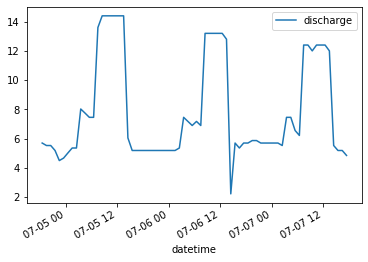

In [50]:
hourly_filled_flow_df.plot()

In [51]:
hourly_filled_flow_df

,discharge
datetime,
2020-07-04 18:30:00,5.69
2020-07-04 19:30:00,5.52
2020-07-04 20:30:00,5.52
2020-07-04 21:30:00,5.18
2020-07-04 22:30:00,4.49
...,...
2020-07-07 13:30:00,12.00
2020-07-07 14:30:00,5.52
2020-07-07 15:30:00,5.18
